# Comparing samples, NK cells, density plots

In this notebook density plots are generated from CLR and DSB normalized protein counts of different NK cell markers. 

- First, NK cells are selected (based on leiden clustering and marker gene/protein analysis in earlier notebook), after which only one sample is selected 
- For comparisons, signals of NK cell markers are compared between NK and B cells.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap
from muon import prot as pt

from ridgeplot import ridgeplot

import warnings

warnings.filterwarnings('ignore')



Global seed set to 0
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


## Easigenomics

In [3]:
#object containing aplastic anemia samples

adata_AA= sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/AA_norm.h5ad')

In [4]:
#selecting only NK cells (=cluster 0), identified in earlier notebook

adata_AA_nk = adata_AA[adata_AA.obs['leiden_0.05'] == "0"]

In [6]:
#Within the NK cell cluster there are cells annotated as "non-leukemic", these cells are removed from analysis 

adata_nk = adata_AA_nk[adata_AA_nk.obs['cell_type'] == "NKT"]

adata_nk

View of AnnData object with n_obs × n_vars = 2655 × 11572
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'batch', 'CD19', 'CD10', 'CD20', 'CD3', 'CD2_prot', 'CD11b', 'HLADR', 'CD38_prot', 'CD11c', 'CD7', 'CD45', 'CD33', 'CD81', 'CD73', 'CD123', 'CD14', 'CD45RA', 'CD45RO', 'CD4', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44_prot', 'CD58', 'CD66ace', 'CD13', 'CD34_prot', 'leiden_0.05'
    var: 'gene_ids', 'feature_types', 'n_cells-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'n_cells-2', 'highly_variable-2', 'means-2', 'dispersion

In [16]:
#selecting only B cells (=cluster 4), identified in earlier notebook

adata_b = adata_AA[adata_AA.obs['leiden_0.05'] == "4"]

In [17]:
adata_b

View of AnnData object with n_obs × n_vars = 401 × 11572
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'batch', 'CD19', 'CD10', 'CD20', 'CD3', 'CD2_prot', 'CD11b', 'HLADR', 'CD38_prot', 'CD11c', 'CD7', 'CD45', 'CD33', 'CD81', 'CD73', 'CD123', 'CD14', 'CD45RA', 'CD45RO', 'CD4', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44_prot', 'CD58', 'CD66ace', 'CD13', 'CD34_prot', 'leiden_0.05'
    var: 'gene_ids', 'feature_types', 'n_cells-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'n_cells-2', 'highly_variable-2', 'means-2', 'dispersions

In [7]:
adata_nk.obs['POOL'].unique().tolist()

['EG34', 'EG36', 'EG35']

In [8]:
#selecting sample, NK cells
sample_eg34 = adata_nk[adata_nk.obs['POOL'] == 'EG34']
sample_eg35 = adata_nk[adata_nk.obs['POOL'] == 'EG35']
sample_eg36 = adata_nk[adata_nk.obs['POOL'] == 'EG36']

In [18]:
#selecting sample, B cells
sample_eg34_b = adata_b[adata_b.obs['POOL'] == 'EG34']
sample_eg35_b = adata_b[adata_b.obs['POOL'] == 'EG35']
sample_eg36_b = adata_b[adata_b.obs['POOL'] == 'EG36']

In [10]:
sample_eg34.shape

(124, 11572)

In [11]:
sample_eg35.shape

(1044, 11572)

In [12]:
sample_eg36.shape

(1487, 11572)

In [19]:
sample_eg34_b.shape

(40, 11572)

In [21]:
sample_eg35_b.shape

(335, 11572)

In [22]:
sample_eg36_b.shape

(26, 11572)

In [67]:
#All samples

AA_clr = adata_nk.obsm['protein_expression_clr']
AA_dsb = adata_nk.obsm['protein_expression_dsb']

AA_clr_b = adata_b.obsm['protein_expression_clr']
AA_dsb_b = adata_b.obsm['protein_expression_dsb']

In [68]:
#CLR + DSB normalized protein counts, NK cells from each sample

sample_eg34_clr=sample_eg34.obsm['protein_expression_clr']
sample_eg34_dsb=sample_eg34.obsm['protein_expression_dsb']

sample_eg35_clr=sample_eg35.obsm['protein_expression_clr']
sample_eg35_dsb=sample_eg35.obsm['protein_expression_dsb']

sample_eg36_clr=sample_eg36.obsm['protein_expression_clr']
sample_eg36_dsb=sample_eg36.obsm['protein_expression_dsb']


In [69]:
#CLR + DSB normalized protein counts, B cells from each sample

sample_eg34_clr_b=sample_eg34_b.obsm['protein_expression_clr']
sample_eg34_dsb_b=sample_eg34_b.obsm['protein_expression_dsb']

sample_eg35_clr_b=sample_eg35_b.obsm['protein_expression_clr']
sample_eg35_dsb_b=sample_eg35_b.obsm['protein_expression_dsb']

sample_eg36_clr_b=sample_eg36_b.obsm['protein_expression_clr']
sample_eg36_dsb_b=sample_eg36_b.obsm['protein_expression_dsb']

In [70]:
#NK cell associated markers (not all specific)

nk_markers = ['CD2', 'CD56', 'CD127', 'CD38', 'CD5', 'CD7']

In [71]:
#Easigenomics, NK markers, selected sample


column_names = nk_markers
df = sample_eg34_clr[column_names]

fig = ridgeplot(
    samples=df.values.T,
    bandwidth=0.5,
    kde_points=np.linspace(-5, 20, 400),
    colorscale="Blues",
    colormode="index",
    coloralpha=0.5,
    labels=column_names,
    spacing=5 / 8,
)

fig.update_layout(
    title="EG34, CLR",
    height=500,
    width=500,
    plot_bgcolor="rgba(255, 255, 255, 0.0)",
    xaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    yaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    yaxis_title="CLR normalized protein counts",
)
fig.show()

df = sample_eg34_dsb[column_names]
fig = ridgeplot(
    samples=df.values.T,
    bandwidth=0.5,
    kde_points=np.linspace(-10, 50, 400),
    colorscale="Blues",
    colormode="index",
    coloralpha=0.5,
    labels=column_names,
    spacing=5 / 8,
)

fig.update_layout(
    title="EG34, DSB",
    height=500,
    width=500,
    plot_bgcolor="rgba(255, 255, 255, 0.0)",
    xaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    yaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    yaxis_title="DSB normalized protein counts",
)
fig.show()

In [72]:
#Easigenomics, NK markers, selected sample


column_names = nk_markers
df = sample_eg35_clr[column_names]

fig = ridgeplot(
    samples=df.values.T,
    bandwidth=0.5,
    kde_points=np.linspace(-5, 20, 400),
    colorscale="Blues",
    colormode="index",
    coloralpha=0.5,
    labels=column_names,
    spacing=5 / 8,
)

fig.update_layout(
    title="EG35, CLR",
    height=500,
    width=500,
    plot_bgcolor="rgba(255, 255, 255, 0.0)",
    xaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    yaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    yaxis_title="CLR normalized protein counts",
)
fig.show()

df = sample_eg35_dsb[column_names]
fig = ridgeplot(
    samples=df.values.T,
    bandwidth=0.5,
    kde_points=np.linspace(-10, 50, 400),
    colorscale="Blues",
    colormode="index",
    coloralpha=0.5,
    labels=column_names,
    spacing=5 / 8,
)

fig.update_layout(
    title="EG35, DSB",
    height=500,
    width=500,
    plot_bgcolor="rgba(255, 255, 255, 0.0)",
    xaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    yaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    yaxis_title="DSB normalized protein counts",
)
fig.show()

In [73]:
#Easigenomics, NK markers, selected sample


column_names = nk_markers
df = sample_eg36_clr[column_names]

fig = ridgeplot(
    samples=df.values.T,
    bandwidth=0.5,
    kde_points=np.linspace(-5, 20, 400),
    colorscale="Blues",
    colormode="index",
    coloralpha=0.5,
    labels=column_names,
    spacing=5 / 8,
)

fig.update_layout(
    title="EG36, CLR",
    height=500,
    width=500,
    plot_bgcolor="rgba(255, 255, 255, 0.0)",
    xaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    yaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    yaxis_title="CLR normalized protein counts",
)
fig.show()

df = sample_eg36_dsb[column_names]
fig = ridgeplot(
    samples=df.values.T,
    bandwidth=0.5,
    kde_points=np.linspace(-10, 50, 400),
    colorscale="Blues",
    colormode="index",
    coloralpha=0.5,
    labels=column_names,
    spacing=5 / 8,
)

fig.update_layout(
    title="EG36, DSB",
    height=500,
    width=500,
    plot_bgcolor="rgba(255, 255, 255, 0.0)",
    xaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    yaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    yaxis_title="DSB normalized protein counts",
)
fig.show()

In [74]:
#Easigenomics, NK markers, selected sample


column_names = nk_markers
df = AA_clr[column_names]

fig = ridgeplot(
    samples=df.values.T,
    bandwidth=0.5,
    kde_points=np.linspace(-5, 20, 400),
    colorscale="Blues",
    colormode="index",
    coloralpha=0.5,
    labels=column_names,
    spacing=5 / 8,
)

fig.update_layout(
    title="All aplastic anemia samples, CLR",
    height=500,
    width=500,
    plot_bgcolor="rgba(255, 255, 255, 0.0)",
    xaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    yaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    yaxis_title="CLR normalized protein counts",
)
fig.show()

df = AA_dsb[column_names]
fig = ridgeplot(
    samples=df.values.T,
    bandwidth=0.5,
    kde_points=np.linspace(-10, 50, 400),
    colorscale="Blues",
    colormode="index",
    coloralpha=0.5,
    labels=column_names,
    spacing=5 / 8,
)

fig.update_layout(
    title="All aplastic anemia samples, DSB",
    height=500,
    width=500,
    plot_bgcolor="rgba(255, 255, 255, 0.0)",
    xaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    yaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    yaxis_title="DSB normalized protein counts",
)
fig.show()

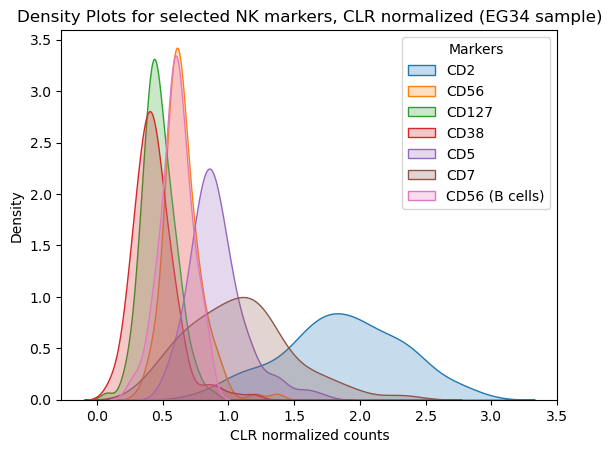

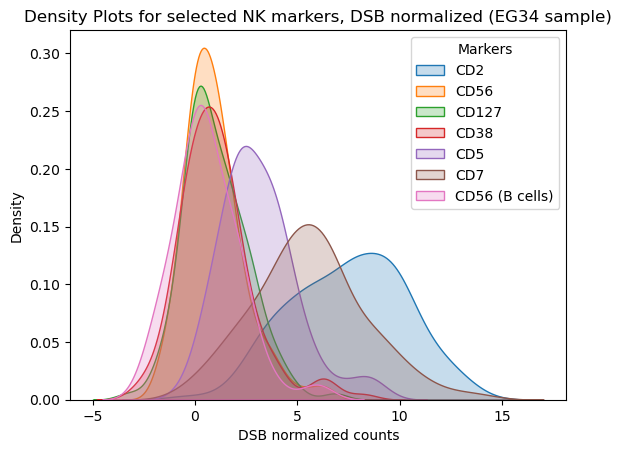

In [75]:
# List of markers to plot
markers = nk_markers

# Iterate through markers
for marker in markers:
    sns.kdeplot(sample_eg34_clr[marker],
                fill=True,
                label = marker)
sns.kdeplot(sample_eg34_clr_b["CD56"],
            fill=True,
            label = "CD56 (B cells)")
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Markers')
plt.title('Density Plots for selected NK markers, CLR normalized (EG34 sample)')
plt.xlabel('CLR normalized counts')
plt.ylabel('Density')

plt.show()

# Iterate through markers
for marker in markers:
    sns.kdeplot(sample_eg34_dsb[marker],
                fill=True,
                label = marker)
sns.kdeplot(sample_eg34_dsb_b["CD56"],
            fill=True,
            label = "CD56 (B cells)")
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Markers')
plt.title('Density Plots for selected NK markers, DSB normalized (EG34 sample)')
plt.xlabel('DSB normalized counts')
plt.ylabel('Density')

plt.show()

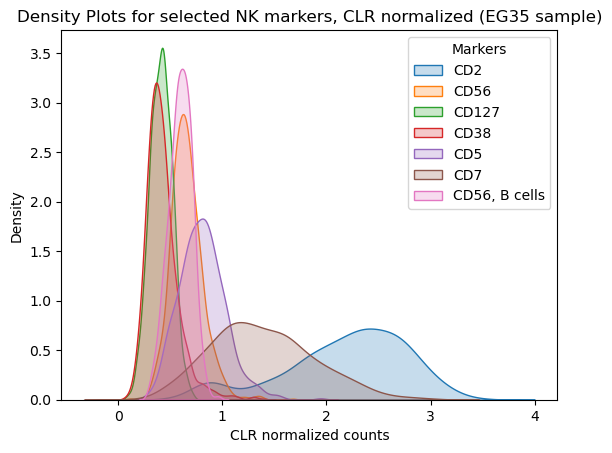

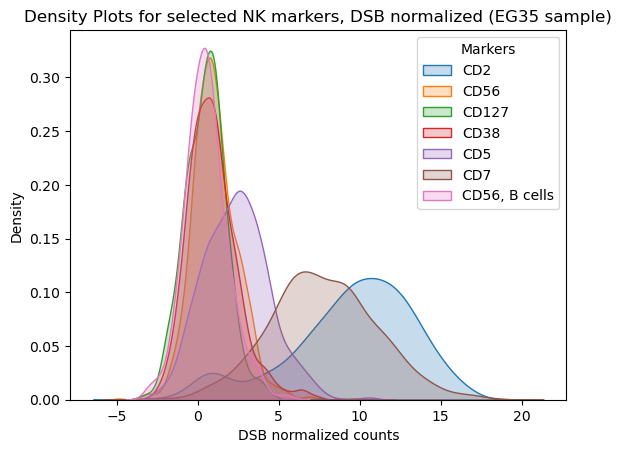

In [76]:
# List of markers to plot
markers = nk_markers

# Iterate through markers
for marker in markers:
    sns.kdeplot(sample_eg35_clr[marker],
                fill=True,
                label = marker)
sns.kdeplot(sample_eg35_clr_b["CD56"],
            fill=True,
            label = "CD56, B cells")
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Markers')
plt.title('Density Plots for selected NK markers, CLR normalized (EG35 sample)')
plt.xlabel('CLR normalized counts')
plt.ylabel('Density')

plt.show()

for marker in markers:
    sns.kdeplot(sample_eg35_dsb[marker],
                fill=True,
                label = marker)
sns.kdeplot(sample_eg35_dsb_b["CD56"],
            fill=True,
            label = "CD56, B cells") 
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Markers')
plt.title('Density Plots for selected NK markers, DSB normalized (EG35 sample)')
plt.xlabel('DSB normalized counts')
plt.ylabel('Density')

plt.show()

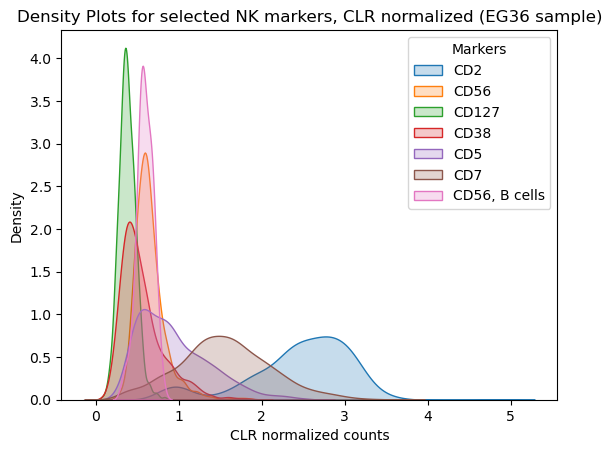

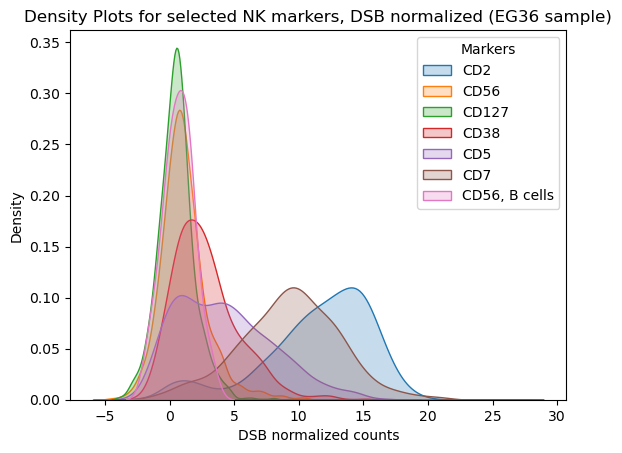

In [77]:
# List of markers to plot
markers = nk_markers

# Iterate through markers
for marker in markers:
    sns.kdeplot(sample_eg36_clr[marker],
                fill=True,
                label = marker)
sns.kdeplot(sample_eg36_clr_b["CD56"],
            fill=True,
            label = "CD56, B cells")
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Markers')
plt.title('Density Plots for selected NK markers, CLR normalized (EG36 sample)')
plt.xlabel('CLR normalized counts')
plt.ylabel('Density')

plt.show()

for marker in markers:
    sns.kdeplot(sample_eg36_dsb[marker],
                fill=True,
                label = marker)
sns.kdeplot(sample_eg36_dsb_b["CD56"],
            fill=True,
            label = "CD56, B cells")
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Markers')
plt.title('Density Plots for selected NK markers, DSB normalized (EG36 sample)')
plt.xlabel('DSB normalized counts')
plt.ylabel('Density')

plt.show()

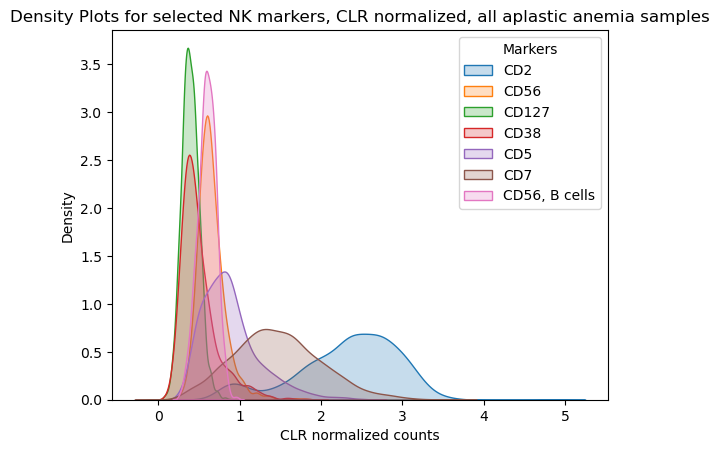

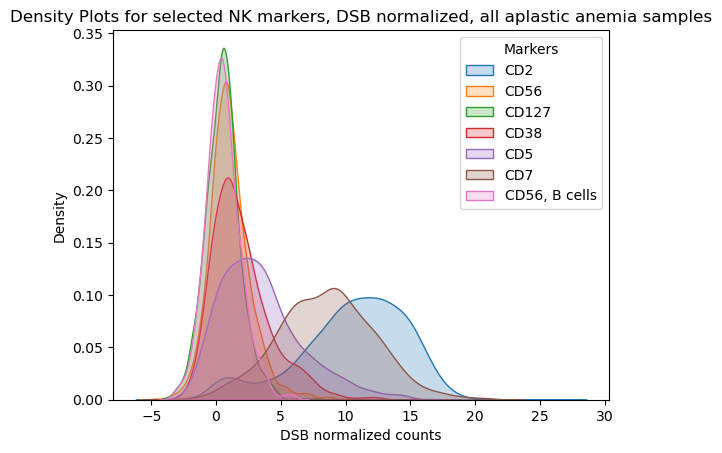

In [78]:
# List of markers to plot
markers = nk_markers

# Iterate through markers
for marker in markers:
    sns.kdeplot(AA_clr[marker],
                fill=True,
                label = marker)
sns.kdeplot(AA_clr_b["CD56"],
            fill=True,
            label = "CD56, B cells")
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Markers')
plt.title('Density Plots for selected NK markers, CLR normalized, all aplastic anemia samples')
plt.xlabel('CLR normalized counts')
plt.ylabel('Density')

plt.show()

for marker in markers:
    sns.kdeplot(AA_dsb[marker],
                fill=True,
                label = marker)
sns.kdeplot(AA_dsb_b["CD56"],
            fill=True,
            label = "CD56, B cells")
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Markers')
plt.title('Density Plots for selected NK markers, DSB normalized, all aplastic anemia samples')
plt.xlabel('DSB normalized counts')
plt.ylabel('Density')

plt.show()